In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [2]:
airlines = pd.read_excel("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Forecasting/Airlines%2BData.xlsx")

In [3]:
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


## Visualization and Data Processing

In [4]:
airlines.shape

(96, 2)

In [5]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [7]:
airlines.corr()

,Passengers
Passengers,1.0


In [8]:
airlines.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [9]:
airlines.duplicated().sum()

0

In [10]:
airlines.set_index('Month',inplace = True)
airlines.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


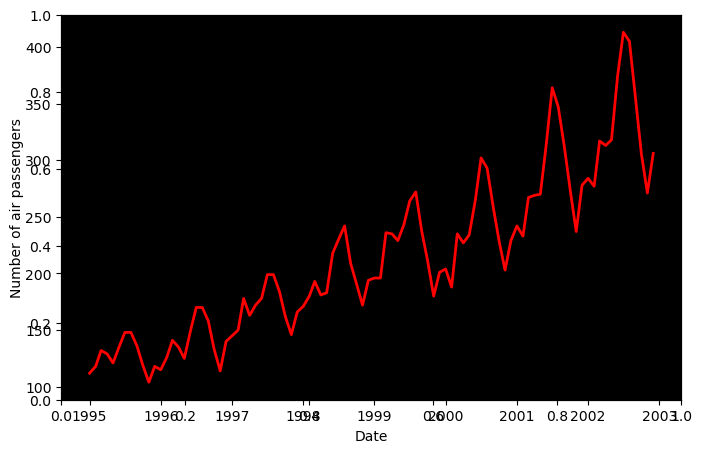

In [11]:
# Lineplot for Passengers
plt.figure(figsize=(8,5))
plt.xlabel("Date")
plt.ylabel("Number of air passengers")
ax = plt.axes()
ax.set_facecolor("black")
plt.plot(airlines['Passengers'], color = 'red', linewidth=2)
plt.show()

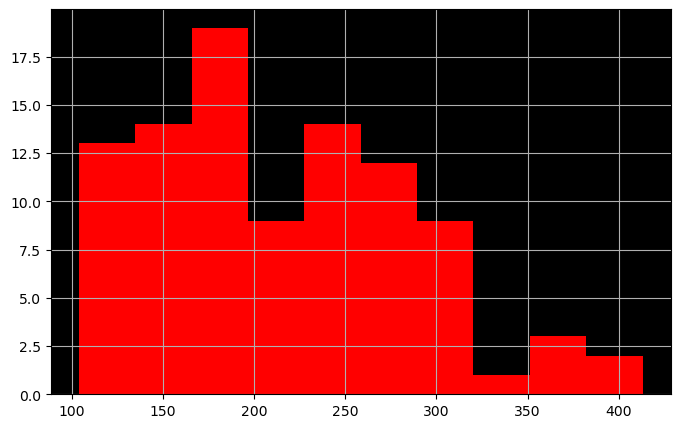

In [12]:
# Histogram
ax = plt.axes()
ax.set_facecolor("black")
airlines['Passengers'].hist(figsize=(8,5), color = 'red')
plt.show()

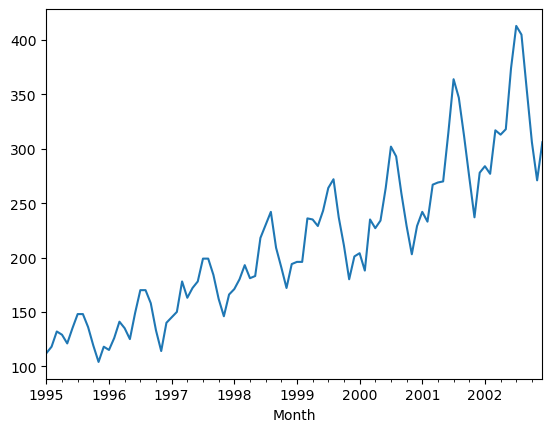

In [13]:
airlines.Passengers.plot()
plt.show()

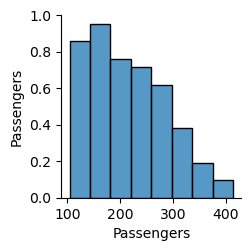

In [14]:
import seaborn as sns
sns.pairplot(airlines)
plt.show()

In [15]:
#Splitting Data
Train = airlines.head(85)
Test = airlines.tail(11)

# Moving Average Method

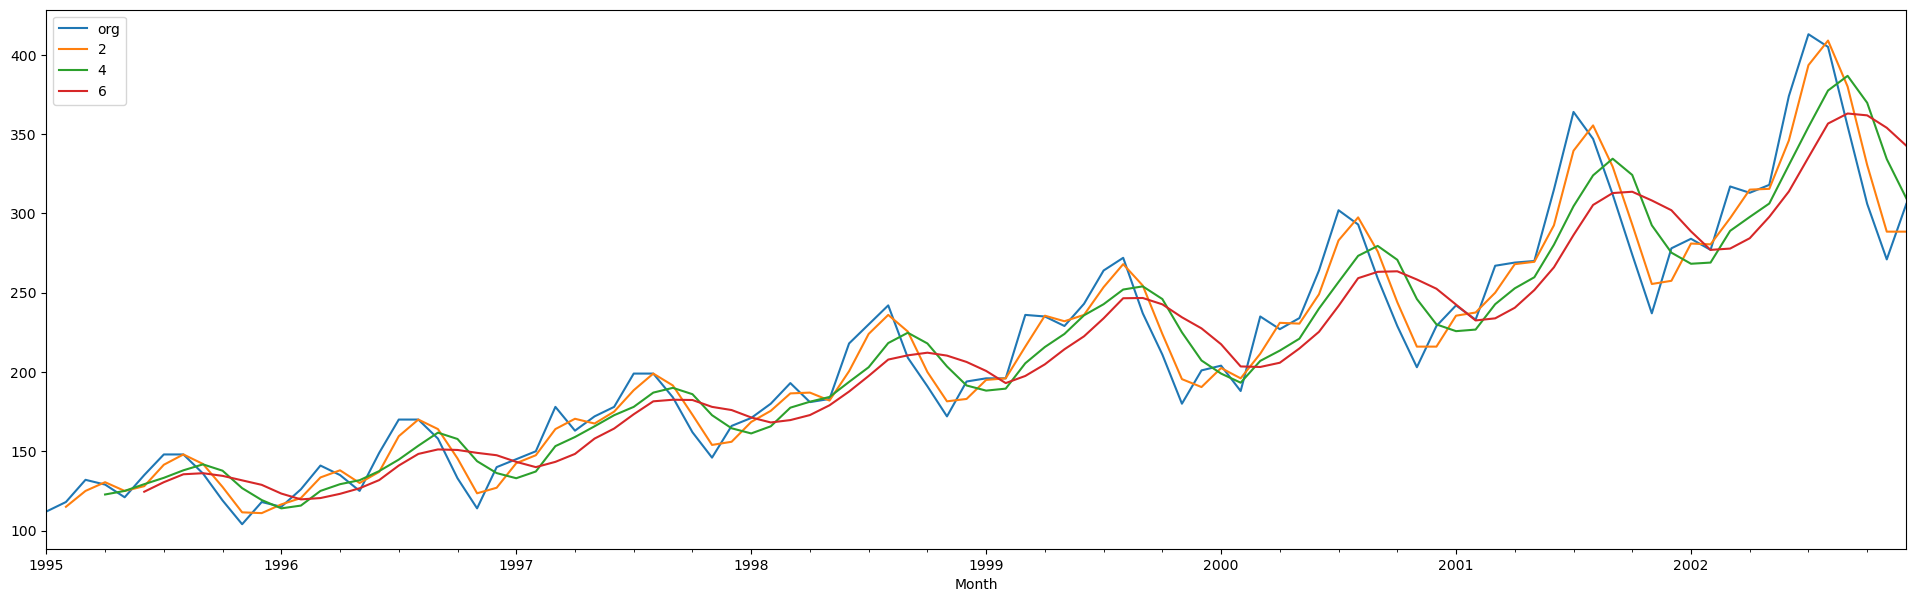

In [16]:
plt.figure(figsize=(24,7))
airlines.Passengers.plot(label="org")
for i in range(2,8,2):
    airlines["Passengers"].rolling(i).mean().plot(label = str(i));
plt.legend(loc = 'best')
plt.show()

# Time series decomposition plot

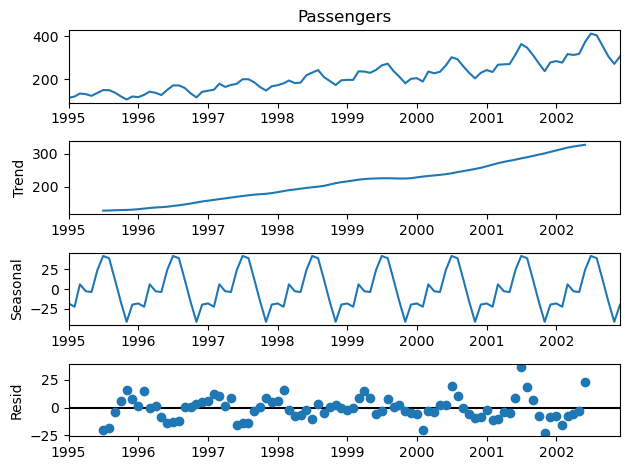

In [17]:
decompose_ts_add = seasonal_decompose(airlines.Passengers,period = 12)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots
- A partial autocorrelation (PACF) is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

C:\Users\vacha\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


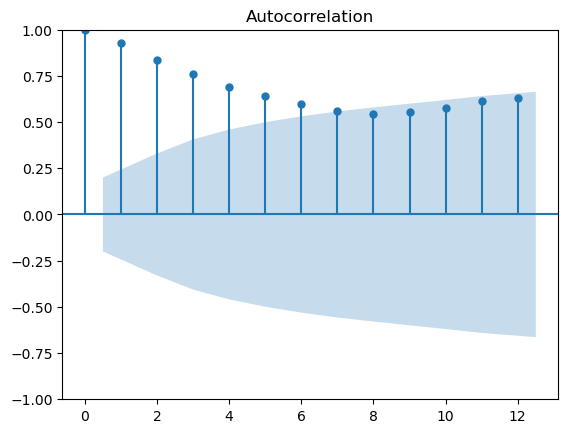

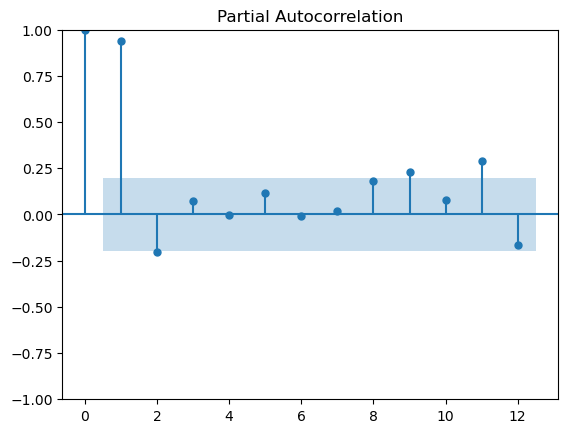

In [18]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(airlines.Passengers,lags=12)
tsa_plots.plot_pacf(airlines.Passengers,lags=12)
plt.show()

# Evaluation Metric RMSE

In [19]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

# Simple Exponential Method

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_model = RMSE(Test.Passengers,pred_ses)
rmse_ses_model

67.48649276500953

# Holt Method

In [22]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model = RMSE(Test.Passengers, pred_hw)
rmse_hw_model

72.44951614305799

# Holts winter exponential smoothing with additive seasonality and additive trend

In [23]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",
                                         seasonal_periods=4).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add_model=RMSE(Test.Passengers,pred_hwe_add_add,) 
rmse_hwe_add_add_model

56.26532166755783

# Holts winter exponential smoothing with multiplicative seasonality and additive trend¶

In [24]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",
                                         seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_mul_add_model =RMSE(pred_hwe_mul_add,Test.Passengers)
rmse_hwe_mul_add_model

54.9963893049329

# Model based Forecasting Methods

In [25]:
# airlines preprocessing for models
airlines["t"] = np.arange(1,97)
airlines["t_squared"] = airlines["t"]*airlines["t"]

airlines["log_Passengers"] = np.log(airlines["Passengers"])

airlines.head()

,Passengers,t,t_squared,log_Passengers
Month,,,,
1995-01-01,112,1,1,4.718499
1995-02-01,118,2,4,4.770685
1995-03-01,132,3,9,4.882802
1995-04-01,129,4,16,4.859812
1995-05-01,121,5,25,4.795791


# Splitting Data

In [26]:
# Splitting data into Train and Test
Train = airlines.head(85)
Test = airlines.tail(11)

In [27]:
Train.head()

,Passengers,t,t_squared,log_Passengers
Month,,,,
1995-01-01,112,1,1,4.718499
1995-02-01,118,2,4,4.770685
1995-03-01,132,3,9,4.882802
1995-04-01,129,4,16,4.859812
1995-05-01,121,5,25,4.795791


# Linear Model

In [28]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['Passengers'], pred_linear)
rmse_linear_model

55.674170015416244

# Exponential Model

In [29]:
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp_model = RMSE(Test['Passengers'], np.exp(pred_Exp))
rmse_Exp_model

47.95514835724099

# Quadratic Model

In [30]:
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad_model = RMSE(Test['Passengers'], pred_Quad)
rmse_Quad_model

50.65954577650051

# Combine train and test data and build final model

In [31]:
# fit model
data = pd.read_excel('https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Forecasting/Airlines%2BData.xlsx', header=0, index_col=0, parse_dates=True)
# prepare data
X = Train.values
X = X.astype('float32')

In [32]:
hwe_model_mul_add =ExponentialSmoothing(airlines["Passengers"],seasonal="mul",trend="add",
                                         seasonal_periods=12).fit()

In [33]:
#Forecasting for next 10 time periods
hwe_model_mul_add.forecast(10)

2003-01-01    312.898312
2003-02-01    308.169462
2003-03-01    355.530127
2003-04-01    345.766661
2003-05-01    345.692182
2003-06-01    392.465936
2003-07-01    436.495826
2003-08-01    429.853511
2003-09-01    380.167289
2003-10-01    332.311686
Freq: MS, dtype: float64

In [34]:
list = [['Simple Exponential Method',rmse_ses_model], ['Holt method',rmse_hw_model],
          ['HW exp smoothing add',rmse_hwe_add_add_model],['HW exp smoothing mult',rmse_hwe_mul_add_model],
          ['Linear Mode',rmse_linear_model],['Exp model',rmse_Exp_model],['Quad model',rmse_Quad_model]]
         

In [35]:
list

[['Simple Exponential Method', 67.48649276500953],
 ['Holt method', 72.44951614305799],
 ['HW exp smoothing add', 56.26532166755783],
 ['HW exp smoothing mult', 54.9963893049329],
 ['Linear Mode', 55.674170015416244],
 ['Exp model', 47.95514835724099],
 ['Quad model', 50.65954577650051]]

In [36]:
df = pd.DataFrame(list,columns=['Model','RMSE_Value'])
df

,Model,RMSE_Value
0,Simple Exponential Method,67.486493
1,Holt method,72.449516
2,HW exp smoothing add,56.265322
3,HW exp smoothing mult,54.996389
4,Linear Mode,55.674170
5,Exp model,47.955148
6,Quad model,50.659546
